In [38]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [39]:
# create function
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3

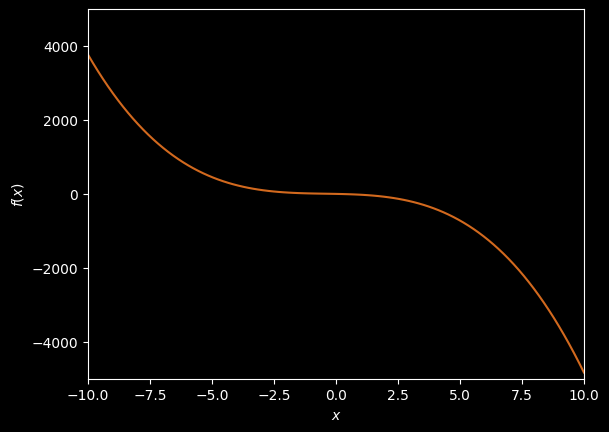

In [48]:
dots = np.linspace(-10, 10, 100)
plt.figure(3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim(-10, 10)
plt.ylim(-5000, 5000)
plt.plot(dots, f(dots), c='chocolate')

In [41]:
np.random.seed(16)
rand_x = np.random.uniform(-10, 10, 10)
f_data = [f(x) for x in rand_x] + np.random.uniform(-1000, 1000, 10)

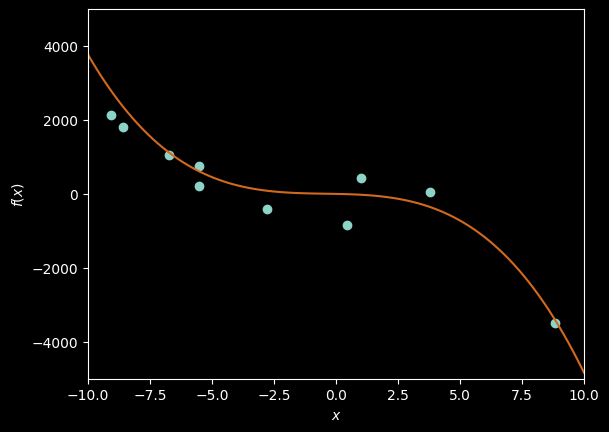

In [47]:
plt.figure(3)
plt.scatter(rand_x, f_data)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim(-10, 10)
plt.ylim(-5000, 5000)
plt.plot(dots, f(dots), c='chocolate')
plt.show()

#### Constant algorithm
$$a(x) = w_{0}.$$

In [56]:
# len(dots)
[dots.mean()]* len(dots)
#[dots.mean()]*len(dots)

[-7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,
 -7.105427357601002e-17,


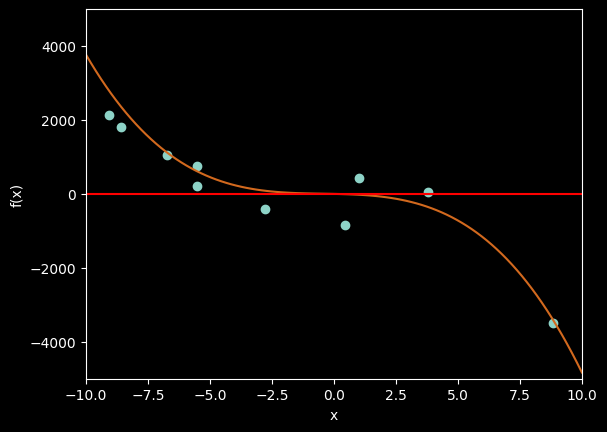

In [57]:
y_means = [dots.mean()]*len(dots)  # [0.000..., 0.000..., 0.000..., ....  repeat x100]

plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), c='chocolate')
plt.scatter(rand_x, f_data)
plt.plot(dots, y_means, c='r')
plt.show()

#### Linear regression
$$a(x) = w_{0} + w_{1}x.$$

In [63]:
from sklearn import linear_model

# create model
linear_regressor = linear_model.LinearRegression()

# learning
linear_regressor.fit(rand_x.reshape(-1, 1), f_data)

LinearRegression()

In [65]:
# weight & free coef
print(linear_regressor.coef_[0], linear_regressor.intercept_) # b0 => b0 + b1 * x1

-237.82400777158773 -411.9249993231067


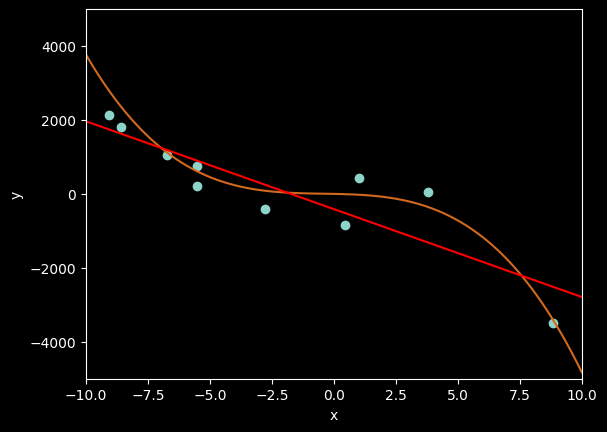

In [70]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), c='chocolate')
plt.scatter(rand_x, f_data)
# 1 var
plt.plot(dots, linear_regressor.coef_[0]*dots + linear_regressor.intercept_, c='r')
# 2 var
#plt.plot(dots, linear_regressor.predict(np.reshape(dots, (-1, 1))), c='g')
plt.show()

Linear regression & constant algorithm show bad result => result: underfitting. It's very light models. Need more complex model.

#### Cubic model
$$a(x) = w_{0} + w_{1}x + w_{2}x^{2} + w_{3}x^{3}.$$

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [72]:
# create cubic model ; use polynomial with max-degree = 3
cubic_regressor = make_pipeline(PolynomialFeatures(degree=3), linear_model.LinearRegression())

cubic_regressor.fit(rand_x.reshape(-1, 1), f_data)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [75]:
print(cubic_regressor.named_steps.linearregression.coef_)
print(cubic_regressor.named_steps.linearregression.intercept_)

[ 0.         21.09882775 -7.90436131 -4.26313079]
-55.95265093706249


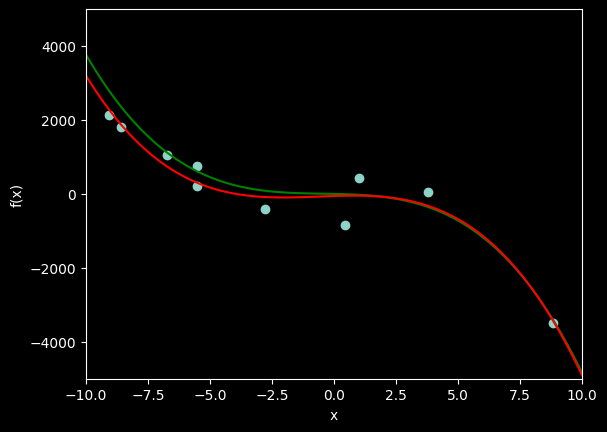

In [77]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(rand_x, f_data)
plt.plot(dots, cubic_regressor.predict(np.reshape(dots, (-1, 1))), color='r')
plt.show()

Good result

In [78]:
# create polynomial 8-degree
eighth_regressor = make_pipeline(PolynomialFeatures(degree=8), linear_model.LinearRegression())

# learning
eighth_regressor.fit(rand_x.reshape(-1, 1), f_data)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=8)),
                ('linearregression', LinearRegression())])

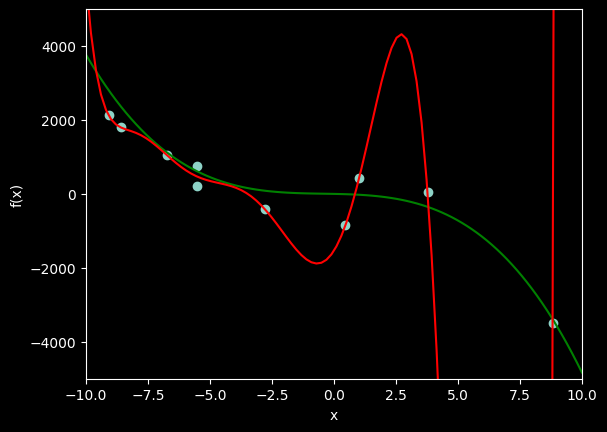

In [79]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(rand_x, f_data)
plt.plot(dots, eighth_regressor.predict(np.reshape(dots, (-1, 1))), color='r')

It's overfitting. Detect it with weights.

In [80]:
print(eighth_regressor.named_steps.linearregression.coef_)
print(eighth_regressor.named_steps.linearregression.intercept_)

[ 0.00000000e+00  1.07116178e+03  8.76325216e+02  4.03130196e+01
 -5.61701732e+01 -9.81320836e+00  9.56286199e-02  1.16554743e-01
  6.21060019e-03]
-1536.7939079933421


Very big weights => shows overfitting